## BI- WEEKLY CHALLENGE(Week 2)

### This coding exercise is to test your knowledge on what you have learnt so far. You are free to use the internet and any other libraries.
### Objective: Build a regressor that recommends the crew member size for potential ship buyers. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read csv file and columns

In [2]:
df=pd.read_csv("ship_info.csv")

In [3]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
df.head(10)

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
5,Ecstasy,Carnival,22,70.367,20.52,8.55,10.20,34.29,9.20
6,Elation,Carnival,15,70.367,20.52,8.55,10.20,34.29,9.20
7,Fantasy,Carnival,23,70.367,20.56,8.55,10.22,34.23,9.20
8,Fascination,Carnival,19,70.367,20.52,8.55,10.20,34.29,9.20
9,Freedom,Carnival,6,110.239,37.00,9.51,14.87,29.79,11.50


In [5]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


### Generating scatter pair plot

/home/rhymeinstein/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


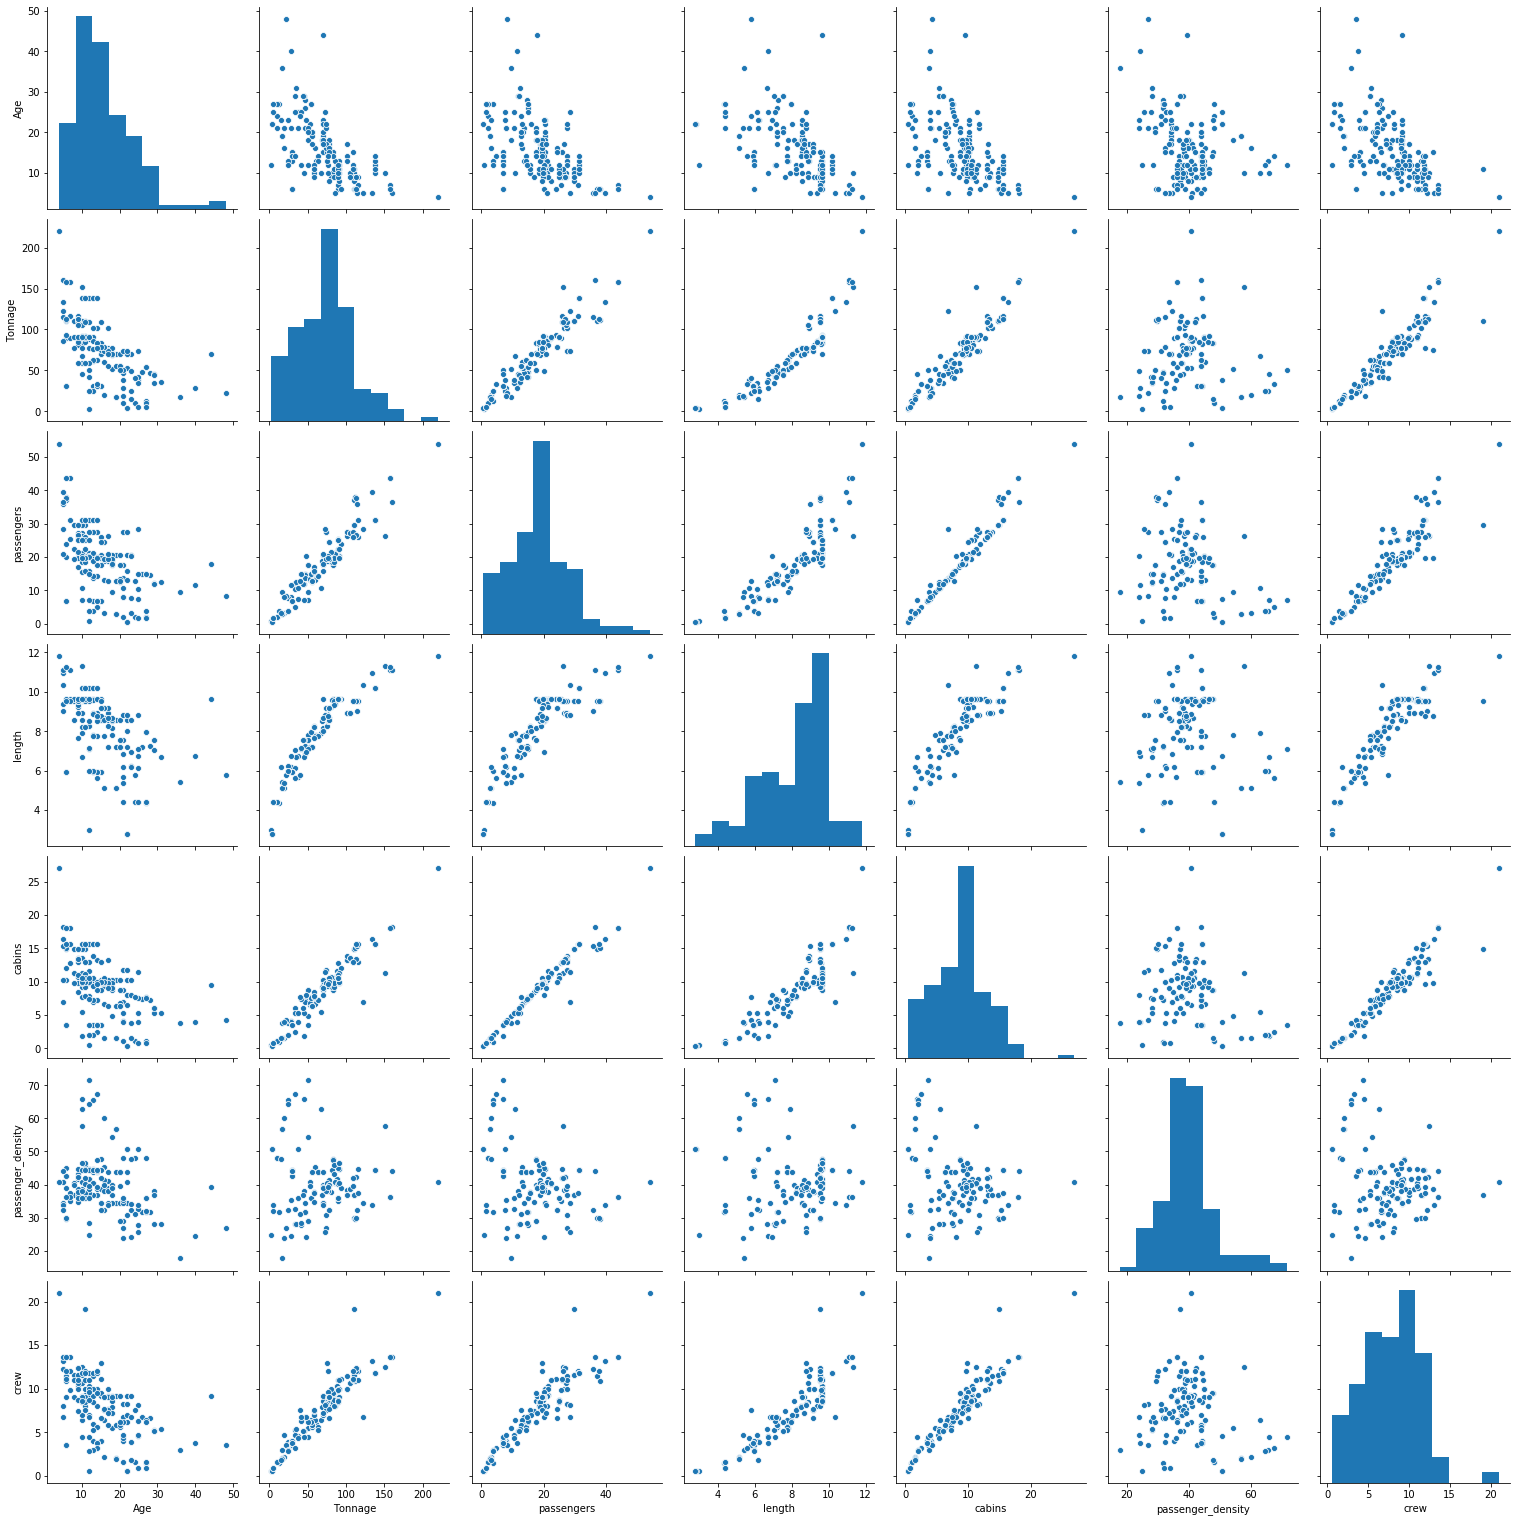

In [7]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
sns.pairplot(df[cols], size=3.0)

### Calculating Pearson correlation coefficient for training and test set

In [8]:
# calculate the Pearson's correlation coefficient
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


#### Selecting column for prediction training and testing

In [9]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
df[cols_selected].head(10)

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00
5,70.367,20.52,8.55,10.20,9.20
6,70.367,20.52,8.55,10.20,9.20
7,70.367,20.56,8.55,10.22,9.20
8,70.367,20.52,8.55,10.20,9.20
9,110.239,37.00,9.51,14.87,11.50


In [10]:
X = df[cols_selected].iloc[:,0:4].values    # features matrix 
y = df[cols_selected]['crew'].values        # target variable

### Partitioning data into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split
X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['crew']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

#### Building regression model

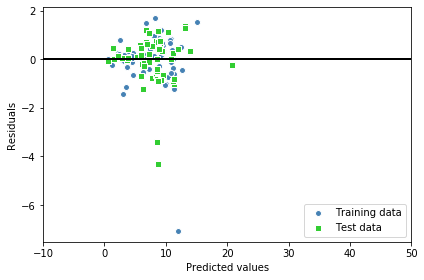

In [12]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


MSE train: 0.955, test: 0.889
R^2 train: 0.920, test: 0.928


#### Regression Coefficients

In [14]:
slr.fit(X_train, y_train).intercept_

-0.7525074496158375

In [15]:
slr.fit(X_train, y_train).coef_

array([ 0.01902703, -0.15001099,  0.37876395,  0.77613801])

### Feature standardization with hyperparameter tuning

In [16]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['crew']  
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_x = StandardScaler()
y_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
train_score = []
test_score = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=4)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))

### Train Score

In [17]:
train_score

array([0.92028261, 0.91733937, 0.94839385, 0.93899476, 0.90621451,
       0.91156903, 0.92726066, 0.94000795, 0.93922948, 0.93629554])

In [18]:
test_score

array([0.92827978, 0.93807946, 0.8741834 , 0.89901199, 0.94781315,
       0.91880183, 0.91437408, 0.89660876, 0.90427477, 0.90139208])

In [19]:
print('R2 train: %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))

R2 train: 0.929 +/- 0.013


In [20]:
print('R2 test: %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))

R2 test: 0.912 +/- 0.021


### Introducing nonlinear dimensionality reduction techniques

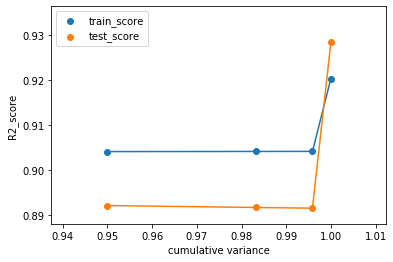

In [21]:
train_score = []
test_score = []
cum_variance = []
for i in range(1,5):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))
    cum_variance = np.append(cum_variance, np.sum(pipe_lr.fit(X_train, y_train).named_steps['pca'].explained_variance_ratio_))
plt.scatter(cum_variance,train_score, label = 'train_score')
plt.plot(cum_variance, train_score)
plt.scatter(cum_variance,test_score, label = 'test_score')
plt.plot(cum_variance, test_score)
plt.xlabel('cumulative variance')
plt.ylabel('R2_score')
plt.legend()
plt.show()

/home/rhymeinstein/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/home/rhymeinstein/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/home/rhymeinstein/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


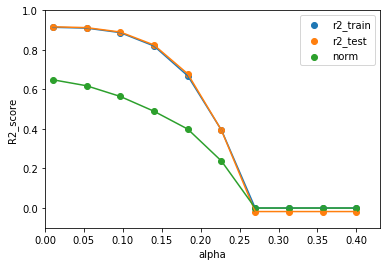

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)
alpha = np.linspace(0.01,0.4,10) #lasso parameters
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.7)
r2_train=[]
r2_test=[]
norm = []
for i in range(10):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train_std,y_train_std)
    y_train_std=lasso.predict(X_train_std)
    y_test_std=lasso.predict(X_test_std)
    r2_train=np.append(r2_train,r2_score(y_train,sc_y.inverse_transform(y_train_std)))
    r2_test=np.append(r2_test,r2_score(y_test,sc_y.inverse_transform(y_test_std)))
    norm= np.append(norm,np.linalg.norm(lasso.coef_))
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'norm')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.43)
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()

### What is Overfitting
 Overfitting is when the model's error on the training set (i.e. during training) is very low but then, the model's error on the test set (i.e. unseen samples) is large! 

### How to avoid Overfitting
    Cross-validation.
    Train with more data
    Remove features.
    Early stopping.
    Regularization.
    Ensembling.

### Difference between Bias and Variance
The bias error is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting). The variance is an error from sensitivity to small fluctuations in the training set.

### When to use Regression over Classification

Regression algorithms helps predict continuous values such as price for non-discrete values
Regression is best when outcome of interest is a real or continuous value. For example, you would like to predict the amount of money a person will spend when they visit your website. 